<a href="https://colab.research.google.com/github/AnJejune/DeepLearning/blob/main/SingleLayerNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

경사 하강법 :
1. 확률적 경사 하강법 => 샘플 데이터 1개에 대한 그레이디언트를 계산       
장점 : 샘플 데이터 1개마다 그레이디언트를 계산하여 가중치를 업데이트 하므로 비용이 적단.            
단점 : 최적값에 수렴하는 과정이 불안정           
2. 배치 경사 하강법 => 전체 훈련 세트를 사용하여 한 번에 그레이디언트를 계산   
장점 : 최적값에 수렴하는 과정이 안정.                  
단점 : 계산 비용이 많이 든다.        

절충안 -> 미니 배치 경사 하강법 : 무작위로 일부만 가져와 배치 경사 하강법 적용 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
class SingleLayer:
  def __init__(self): 
    self.w = None 
    self.b = None
    self.losses = [] # 손실함수의 결과 값을 저장할 리스트

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b     # 직선 방정식 계산
    return z
  
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad
  
  def fit(self, x, y, epochs=100):  
    self.w = np.ones(x.shape[1]) 
    self.b = 0 
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
      for i in indexes:
        z = self.forpass(x[i]) # 직선 방정식 적용( 정방향 계산 ) 
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a); # 오차계산 => 로지스틱 손실 함수 미분값 
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑 후 손실을 누적
        loss += -(y[i]*np.log(a) + (1-y[i]) * np.log(1-a)) # 에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))
  
  def activation(self, z): # 활성화 함수 구현 (z값은 np(배열)로 넘어옴)
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z)) # 시그모이드 함수
    return a
  
  def predict(self, x): # 예측 메서드 구현
    z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용 
    return np.array(z) > 0 # 스템 함수 적용
    # z가 0보다 크면 시그모이드 함수의 출력값은 0.5보다 크고 작으면 0.5보다 작으므로 굳이 시그모이드 함수를 사용하지 않아도 된다.

  def score(self, x, y): # 정확도 출력 
    return np.mean(self.predict(x) ==  y)


In [ ]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9210526315789473

정확도가 좋아진 이유 => 에포크마다 훈련 세트를 무작위로 섞어(indexes) 손실 함수의 값을 줄였기 때문

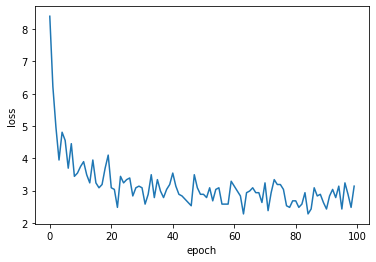

In [ ]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

에포크가 진행함에 따라 손실 함수의 값이 감소함.           
신경망 알고리즘은 로지스틱 회귀 알고리즘을 확장한 네트워크 아직 은닉충 X

사이킷런으로 로지스틱 회귀

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter = 100, tol=1e-3, random_state = 42)
# loss(손실 함수) = log
# max_iter(반복 횟수) = 100
# tol(반복할 때마다 로지스틱 손실 함수의 값이 tol에 지정한 값만큼 감소되 않으면 반복 중단) = 1e-3

In [ ]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
sgd.predict(x_test[0:10]) # 사이킷런을 이용한 샘플 10개 예측 

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])